# Water Quality

**Context :**
Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. This is important as a health and development issue at a national, regional and local level. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions in adverse health effects and health care costs outweigh the costs of undertaking the interventions.

**Potabiliy :** Indicates if water is safe for human consumption where *1 means Potable and 0 means Not potable.*



## Importing Dependancies

In [ ]:
# Importing dependancies
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import plot_roc_curve
from sklearn.metrics import precision_score, recall_score, f1_score 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score

## Getting our data ready

Reading into our `csv` data .

In [ ]:
df = pd.read_csv("/content/water_potability.csv")
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
df.tail()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.177061,7.509306,NaN,327.459760,16.140368,78.698446,2.309149,1


Checking the length of raw dataset we have availbale with us.

In [ ]:
len(df)

3276

Let's check the number of null values in the `DataFrame`.

In [ ]:
df["ph"].isnull().sum()

491

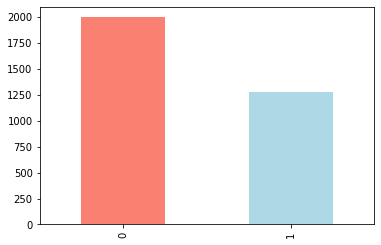

In [ ]:
df["Potability"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

### Check for `null` values

In [ ]:
# finding columns with null values
for elem in df.columns:
  null = df[elem].isnull().sum()
  if null:
    print(f"Number of Null values for {elem} is {null}")

Number of Null values for ph is 491
Number of Null values for Sulfate is 781
Number of Null values for Trihalomethanes is 162


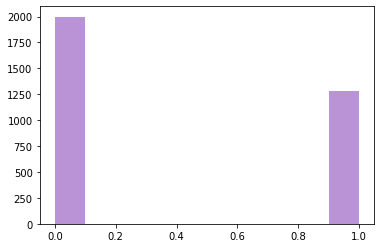

In [ ]:
plt.hist(df["Potability"], color="#B993D6");

### Insights of the data

In [ ]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.469956,32.879761,8768.570828,1.583085,36.142612,80.824064,3.308162,15.769881,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.080795,196.967627,20927.833607,7.130299,333.775777,421.884968,14.218338,66.396293,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


### Visualizing the data

There are 9 features for this data set. Let's plot them on a graph and try to understand how each feature is helpful for target prediction.

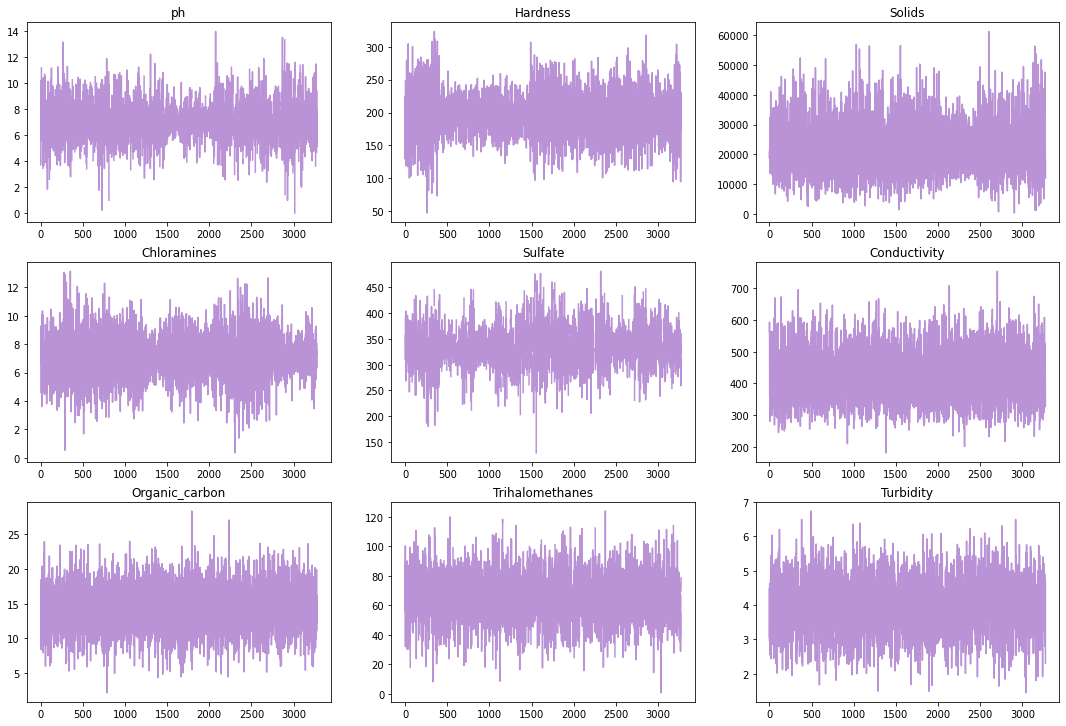

In [ ]:
fig, axs = plt.subplots(3, 3)
k=0
fig.set_size_inches(18.5, 12.5)
plt.colormaps()
for i in range(0, 3):
  for j in range(0, 3):
    axs[i, j].plot(df[df.columns[k]], color="#B993D6")
    axs[i, j].set_title(df.columns[k])
    k +=1

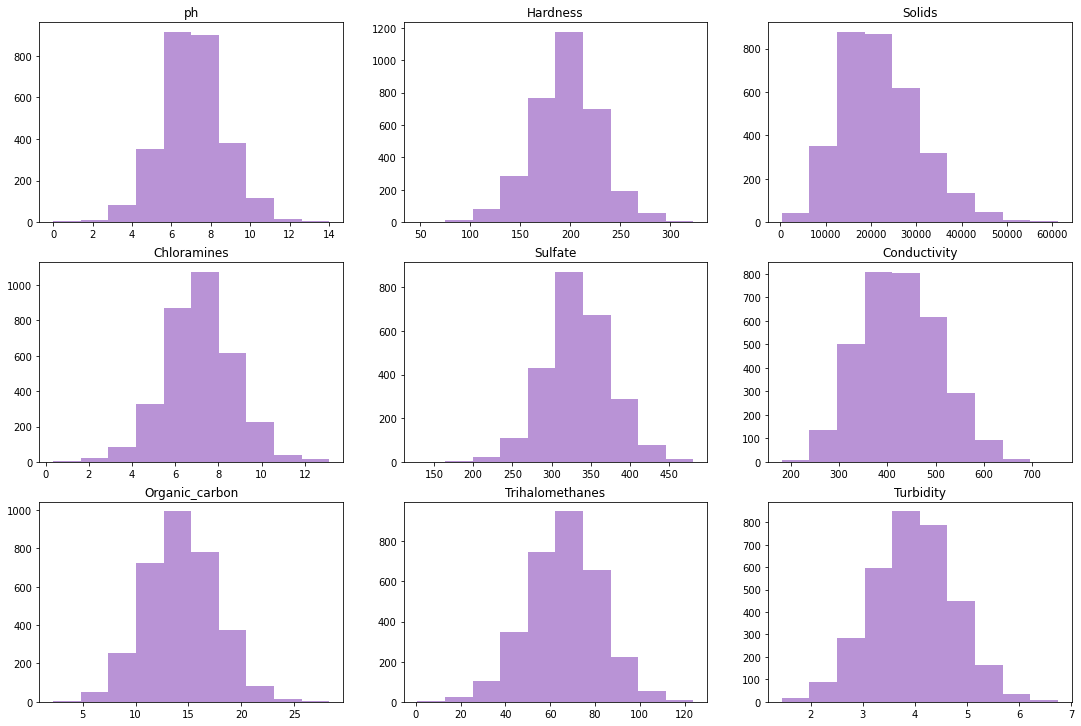

In [ ]:
fig, axs = plt.subplots(3, 3)
k=0
fig.set_size_inches(18.5, 12.5)
for i in range(0, 3):
  for j in range(0, 3):
    axs[i, j].hist(df[df.columns[k]], color="#B993D6")
    axs[i, j].set_title(df.columns[k])
    k +=1

## Filling the missing values

As we already discussed the dataset has some missing values. For this notebook we will be filling the missing the values with the mean of the available values.

In [ ]:
df["ph"].fillna((df['ph'].mean()), inplace=True)
df["Sulfate"].fillna((df['Sulfate'].mean()), inplace=True)
df["Trihalomethanes"].fillna((df['Trihalomethanes'].mean()), inplace=True)

In [ ]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
# finding columns with null values
for elem in df.columns:
  null = df[elem].isnull().sum()
  if null:
    print(f"Number of Null values for {elem} is {null}")

## Balancing the data

The data we have been given is unfortunately not balanced and using this kind of uneven data would lead to improper decision making for our model. To solve this issue we will limit the excess target values meaning droping them and continuing only with equal number of target columns which in our case is `Potability`.

In [ ]:
# Balancing the data
df_drop = df.groupby("Potability").apply(lambda x: x.sample(n=1278)).reset_index(drop = True)

See, now the number of values in our data is equal.

In [ ]:
df_drop["Potability"].value_counts()

1    1278
0    1278
Name: Potability, dtype: int64

## Splitting the data

In [ ]:
X = df_drop.drop(columns="Potability")
y = df_drop["Potability"]

To check the visualizations after balancing and dropping some of the data.

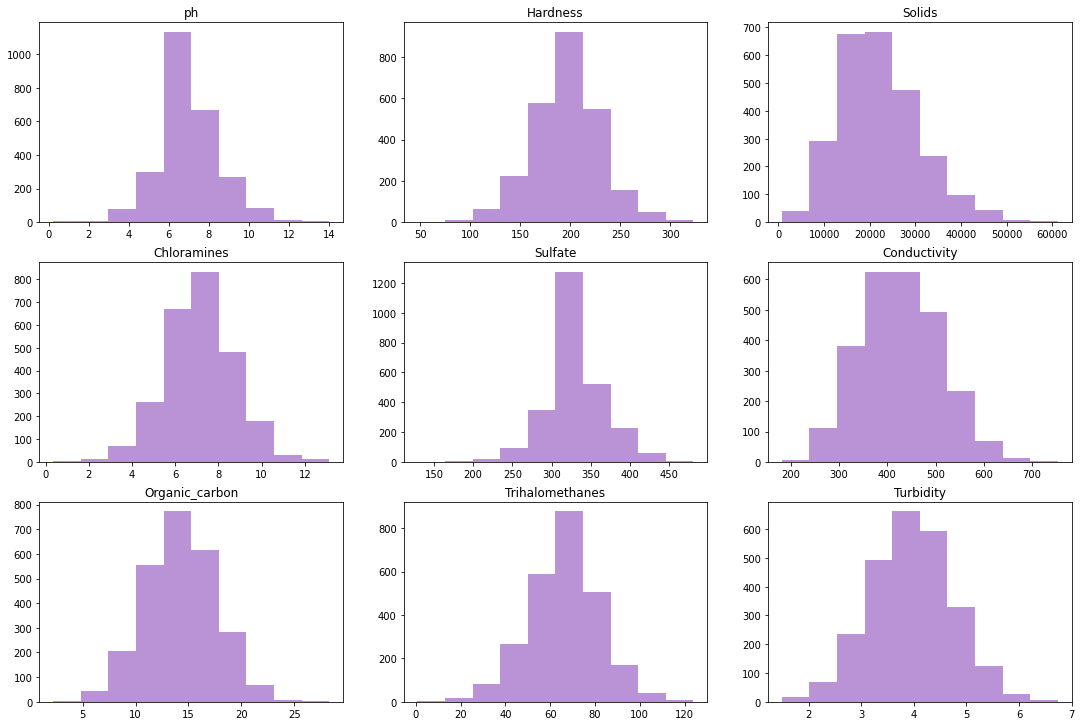

In [ ]:
fig, axs = plt.subplots(3, 3)
k=0
fig.set_size_inches(18.5, 12.5)
for i in range(0, 3):
  for j in range(0, 3):
    axs[i, j].hist(df_drop[df_drop.columns[k]], color="#B993D6")
    axs[i, j].set_title(df_drop.columns[k])
    k +=1

In [ ]:
X.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,6.283679,205.376624,19905.436548,7.078345,284.206021,471.904032,18.027160,64.362608,4.480771
1,2.803563,186.123924,11920.907422,8.642034,332.744519,447.594219,18.482185,87.697443,3.489939
2,7.080795,185.121996,16110.183643,6.444435,355.567366,386.508599,11.215654,38.041516,2.840893
3,6.320375,165.821545,20481.642071,7.605958,354.289035,422.341048,14.793960,46.043065,2.728617
4,6.988206,144.209535,33357.515863,6.771945,333.775777,409.006788,17.880332,54.111785,1.899683


In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Potability, dtype: int64

In [ ]:
len(X), len(y)

(2556, 2556)

### Train Test split

In [ ]:
# train, test split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.15, 
                                                    random_state=42)

In [ ]:
len(X_train), len(y_train), len(X_test), len(y_test)

(2172, 2172, 384, 384)

In [ ]:
X_train.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
443,7.858663,210.954754,26703.853473,6.509065,341.341899,374.072845,8.811986,72.799798,3.422471
208,5.574117,193.158076,17546.403256,9.219973,366.197418,538.532518,13.951332,67.142033,5.152528
2316,5.636924,159.139410,27283.780655,6.918727,328.907287,317.830981,13.611408,36.335199,3.007138
445,6.922042,201.410123,16515.872166,8.463004,357.935222,336.046451,20.929103,60.520904,4.242947
679,7.400239,218.824813,8136.071591,6.286358,310.761160,518.732778,15.186342,50.837013,4.880120


In [ ]:
y_train.head()

443     0
208     0
2316    1
445     0
679     0
Name: Potability, dtype: int64

In [ ]:
y_train.value_counts()

1    1087
0    1085
Name: Potability, dtype: int64

In [ ]:
y_test.value_counts()

0    193
1    191
Name: Potability, dtype: int64

## Models

For this regression model I have limited myself to not to use tensorflow and focus more on Scikit-learn an awesome Machine Learning library and my favourite for regression models.

### Model 1 (Using Tensorflow)
This is the first model using tensorflow just to see what our own custom created models can reach.

In [ ]:
# Creating a model
model_1 = tf.keras.Sequential([
  # tf.keras.layers.Dense(100, activation="relu"),
  # tf.keras.layers.Dense(25, activation="relu"),
  tf.keras.layers.Dense(25, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compiling the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# Fitting the model
model_1.fit(X_train, y_train,
            epochs=50)

Epoch 1/50
68/68 [==============================] - 0s 1ms/step - loss: 0.5005 - mae: 0.5005
Epoch 2/50
68/68 [==============================] - 0s 1ms/step - loss: 0.5005 - mae: 0.5005
Epoch 3/50
68/68 [==============================] - 0s 1ms/step - loss: 0.5005 - mae: 0.5005
Epoch 4/50
68/68 [==============================] - 0s 1ms/step - loss: 0.5005 - mae: 0.5005
Epoch 5/50
68/68 [==============================] - 0s 1ms/step - loss: 0.5005 - mae: 0.5005
Epoch 6/50
68/68 [==============================] - 0s 1ms/step - loss: 0.5005 - mae: 0.5005
Epoch 7/50
68/68 [==============================] - 0s 1ms/step - loss: 0.5005 - mae: 0.5005
Epoch 8/50
68/68 [==============================] - 0s 1ms/step - loss: 0.5005 - mae: 0.5005
Epoch 9/50
68/68 [==============================] - 0s 1ms/step - loss: 0.5005 - mae: 0.5005
Epoch 10/50
68/68 [==============================] - 0s 1ms/step - loss: 0.5005 - mae: 0.5005
Epoch 11/50
68/68 [==============================] - 0s 1ms/step - lo

Looks like the model is just guessing and that to not perfectly.

In [ ]:
model_1.evaluate(X_test, y_test)

12/12 [==============================] - 0s 1ms/step - loss: 0.4974 - mae: 0.4974


[0.4973958432674408, 0.4973958432674408]

### Model 2 (Logistic Regression)

From here we will be using Scikit-learn's model. Beginning with [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42).fit(X_train, y_train)

So the model here is just being a bit good than guessing.

In [ ]:
clf.score(X_train, y_train)

0.5248618784530387

In [ ]:
clf.score(X_test, y_test)

0.5

In [ ]:
arr = clf.predict(X_test)

In [ ]:
for i in range(0, len(arr)):
  if arr[i] == 1:
    print(f"Index - {i}") 

In [ ]:
arr

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,

In [ ]:
np.array(y_test)

array([0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(arr, y_test)

0.5

### Model 3 (Stochastic Gradient descent Classifier)

For this model we will be using [Stochastic Gradient descent Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier).

In [ ]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

Again just a bit more than guessing.

In [ ]:
clf.score(X_test, y_test)

0.5026041666666666

### Model 4 (KNN & Random Forest)

In [ ]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(solver='liblinear'), 
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, Y_train, Y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    Y_train : training labels
    Y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, Y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, Y_test)
    return model_scores

In [ ]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             Y_train=y_train,
                             Y_test=y_test)

model_scores

{'KNN': 0.4947916666666667,
 'Logistic Regression': 0.4635416666666667,
 'Random Forest': 0.6041666666666666}

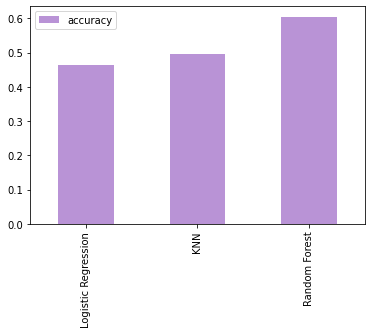

In [ ]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar(color="#B993D6");

#### Tuning KNN

In [ ]:
# Tuning KNN

train_scores = []
test_scores = []

# Create a list of differnt values for n_neighbours
neighbors = range(1,21)

# Setup KNN instance 
knn = KNeighborsClassifier()

# Loop through differnt n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fitting the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores list 
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

In [ ]:
train_scores

[1.0,
 0.7504604051565378,
 0.7624309392265194,
 0.6860036832412523,
 0.6979742173112339,
 0.6574585635359116,
 0.6579189686924494,
 0.6335174953959485,
 0.6358195211786372,
 0.6293738489871087,
 0.6298342541436464,
 0.6252302025782689,
 0.6197053406998159,
 0.6035911602209945,
 0.6022099447513812,
 0.6012891344383057,
 0.5906998158379374,
 0.5796500920810314,
 0.58195211786372,
 0.580110497237569]

In [ ]:
test_scores

[0.4947916666666667,
 0.4817708333333333,
 0.4869791666666667,
 0.5104166666666666,
 0.4947916666666667,
 0.4973958333333333,
 0.5104166666666666,
 0.4817708333333333,
 0.5182291666666666,
 0.4921875,
 0.5078125,
 0.5026041666666666,
 0.4817708333333333,
 0.5078125,
 0.4973958333333333,
 0.4765625,
 0.4791666666666667,
 0.4895833333333333,
 0.4921875,
 0.4635416666666667]

#### Visualizing KNN Score

Maximum KNN Score on the test data: 51.82%


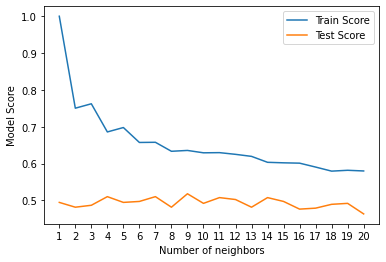

In [ ]:
plt.plot(neighbors, train_scores, label="Train Score")
plt.plot(neighbors, test_scores, label="Test Score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model Score")
plt.legend()

print(f"Maximum KNN Score on the test data: {max(test_scores)*100:.2f}%")

In [ ]:
# Creating a hyperparameter grid for LogisticRegression
log_reg_grid = {"C":np.logspace(-4,4,20),
               "solver": ["liblinear"]}

# Creating a hyperparameter grid for RandomForesClassifier
rf_grid = {"n_estimators": np.arange(10,1000,50),
          "max_depth": [None, 3,5,10],
          "min_samples_split": np.arange(2,20,2),
          "min_samples_leaf": np.arange(1,20,2)}

#### Tuning Logistic Regression 

In [ ]:
# Tuning LogisticRegression
np.random.seed(42)

# Setting up random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=9,
                               n_iter=25,
                               verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train);

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 20 is smaller than n_iter=25. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 9 folds for each of 20 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    2.3s finished


In [ ]:
rs_log_reg.score(X_test,y_test)

0.4635416666666667

In [ ]:
np.random.seed(42)

# Setting up random hyperparameter search for RandomForestClassifier()
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=9,
                           n_iter=25,
                           verbose=True)

# Fitting random hyperparameter search model for RandomForestClassfier()
rs_rf.fit(X_train, y_train)

Fitting 9 folds for each of 25 candidates, totalling 225 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 225 out of 225 | elapsed:  7.9min finished


RandomizedSearchCV(cv=9, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
# Finding the best parameteres
rs_rf.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 14,
 'n_estimators': 510}

In [ ]:
# Evaluating the Randomized search RandomForestClassifier model
rs_rf.score(X_test, y_test)

0.6197916666666666

#### Best Model Scores 

In [ ]:
model_scores

{'KNN': 0.4947916666666667,
 'Logistic Regression': 0.4635416666666667,
 'Random Forest': 0.6041666666666666}

In [ ]:
# Hyperparameters for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-4,4,30),
                "solver": ["liblinear"]}

# Grid Hyperparmeter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)
# Fitting grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.8s finished


In [ ]:
# Checking the best Hyperparameter
gs_log_reg.best_params_

{'C': 0.0006723357536499335, 'solver': 'liblinear'}

In [ ]:
# Evaluating the grid Search LogisticRegression model
gs_log_reg.score(X_test, y_test)

0.4713541666666667

In [ ]:
model_scores

{'KNN': 0.4947916666666667,
 'Logistic Regression': 0.4635416666666667,
 'Random Forest': 0.6041666666666666}

#### Tuning Random Forest Classifier

In [ ]:
# Hyperparameters for our RandomForestClassifier Model
rf_grid = {'n_jobs': [1],
         'verbose': [0],
          'n_estimators': [100]}

# Grid Hyperparmeter search for LogisticRegression
gs_rf = GridSearchCV(RandomForestClassifier(),
                         param_grid=rf_grid,
                         cv=2,
                         verbose=True)

# Fitting grid hyperparameter search model
gs_rf.fit(X_train, y_train)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s finished


GridSearchCV(cv=2, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
# Checking the best Hyperparameter
gs_rf.best_params_

{'n_estimators': 100, 'n_jobs': 1, 'verbose': 0}

In [ ]:
# Evaluating the grid Search LogisticRegression model
gs_rf.score(X_test, y_test)

0.6197916666666666

In [ ]:
model_scores["Random Forest"]

0.6041666666666666

In [ ]:
tuned_model = RandomForestClassifier()
tuned_model.fit(X_train,y_train)
tuned_model.score(X_test, y_test)

0.6171875

In [ ]:
# Make predictions with tuned model
Y_preds = tuned_model.predict(X_test)

## Plotting ROC Curve for the best model

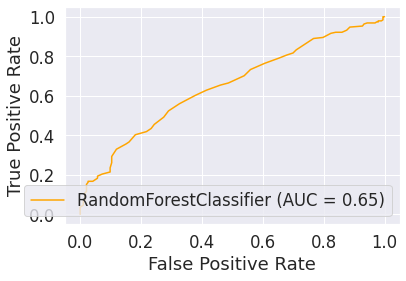

In [ ]:
# Plotting ROC curve and calculate AUC metric
plot_roc_curve(tuned_model, X_test, y_test, color = "orange");

## Confusion Matrix

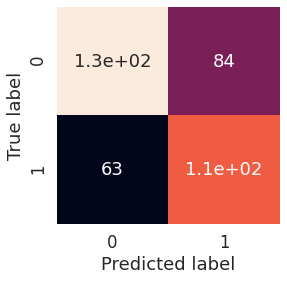

In [ ]:
import seaborn as sns
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, Y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(4, 4))
    ax = sns.heatmap(confusion_matrix(Y_preds, y_test),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis 
    
plot_conf_mat(y_test, Y_preds)

1.3e+02 = 1.3 * 10^2 <br>
1.1e+02 = 1.1 * 10^2 

In [ ]:
130+110

240

In [ ]:
63+84

147

In [ ]:
len(y_test)

384

In [ ]:
print(classification_report(y_test, Y_preds))

              precision    recall  f1-score   support

           0       0.61      0.67      0.64       193
           1       0.63      0.56      0.59       191

    accuracy                           0.62       384
   macro avg       0.62      0.62      0.62       384
weighted avg       0.62      0.62      0.62       384



## Feature Importance 

Trying to find whixh features were more useful in predicting the target label.

In [ ]:
# Fitting an instance of RandomForestClassifier()
clf = RandomForestClassifier(n_estimators = 100,
                             n_jobs= 1)

clf.fit(X_train, y_train);

In [ ]:
# Checking feature_importances_
clf_ = list(clf.feature_importances_)

In [ ]:
# Matching feature_importances_ of features to columns
feature_dict = dict(zip(df.columns,clf_))
feature_dict

{'Chloramines': 0.1127215153698058,
 'Conductivity': 0.09957454978757804,
 'Hardness': 0.12454856742070103,
 'Organic_carbon': 0.10012132520016527,
 'Solids': 0.11594545040829801,
 'Sulfate': 0.1221698709027506,
 'Trihalomethanes': 0.10055914112926233,
 'Turbidity': 0.09659488802974116,
 'ph': 0.12776469175169777}

### Feature Importance Chart

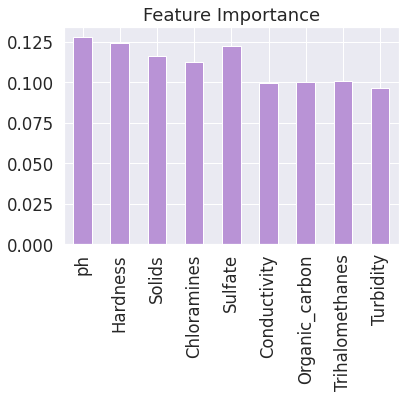

In [ ]:
# Visualizing feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False, color="#B993D6");